In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [123]:
songs = pd.read_csv('data/df_audio_features_1000.csv')

In [124]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1387 non-null   object 
 1   artist            1387 non-null   object 
 2   danceability      1387 non-null   float64
 3   energy            1387 non-null   float64
 4   key               1387 non-null   int64  
 5   loudness          1387 non-null   float64
 6   mode              1387 non-null   int64  
 7   speechiness       1387 non-null   float64
 8   acousticness      1387 non-null   float64
 9   instrumentalness  1387 non-null   float64
 10  liveness          1387 non-null   float64
 11  valence           1387 non-null   float64
 12  tempo             1387 non-null   float64
 13  duration_ms       1387 non-null   int64  
 14  time_signature    1387 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 162.7+ KB


In [125]:
songs.set_index(['name','artist'], inplace = True)

In [302]:
minmax = MinMaxScaler(feature_range=(0,1))

In [303]:
songs_scaled_minmax = minmax.fit_transform(songs)

In [304]:
songs_scaled_minmax = pd.DataFrame(songs_scaled_minmax, columns = songs.columns, index = songs.index)

Text(0.5, 1.0, 'Data with MinMaxScaler')

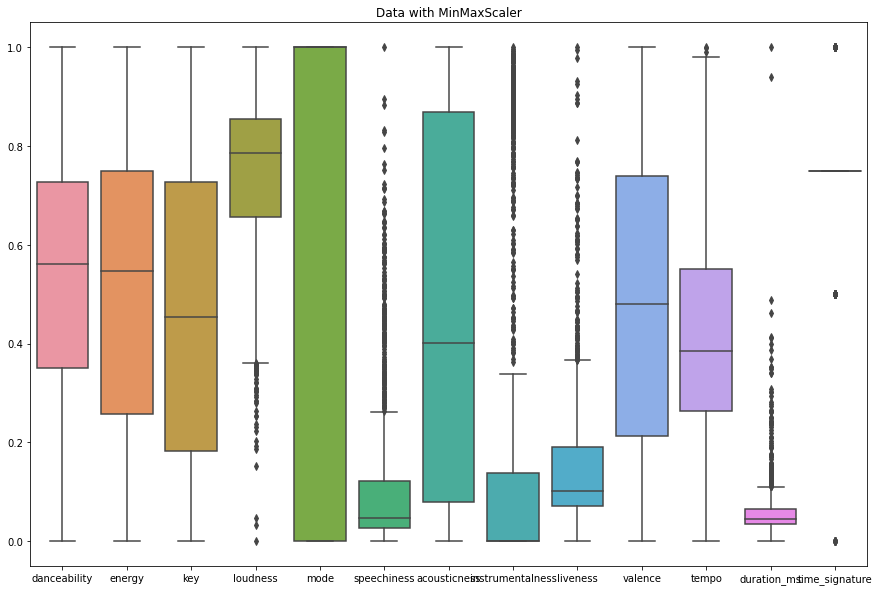

In [129]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled_minmax.loc[:, songs.columns]).set_title('Data with MinMaxScaler')

In [14]:
maxabs = MaxAbsScaler()

In [15]:
songs_scaled_maxabs = maxabs.fit_transform(songs)

In [16]:
songs_scaled_maxabs = pd.DataFrame(songs_scaled_maxabs, columns = songs.columns, index = songs.index)

Text(0.5, 1.0, 'Data with MaxAbsScaler')

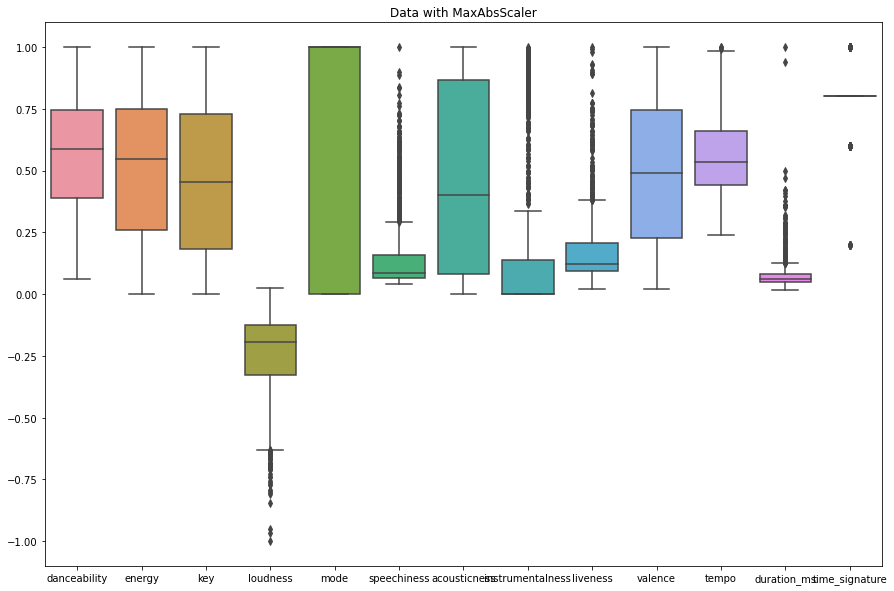

In [17]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled_maxabs.loc[:, songs.columns]).set_title('Data with MaxAbsScaler')

In [18]:

robustscaler = RobustScaler()

In [19]:
songs_scaled_robustscaler = robustscaler.fit_transform(songs)

In [20]:
songs_scaled_robustscaler = pd.DataFrame(songs_scaled_robustscaler, columns = songs.columns, index = songs.index)

Text(0.5, 1.0, 'Data with RobustScaler')

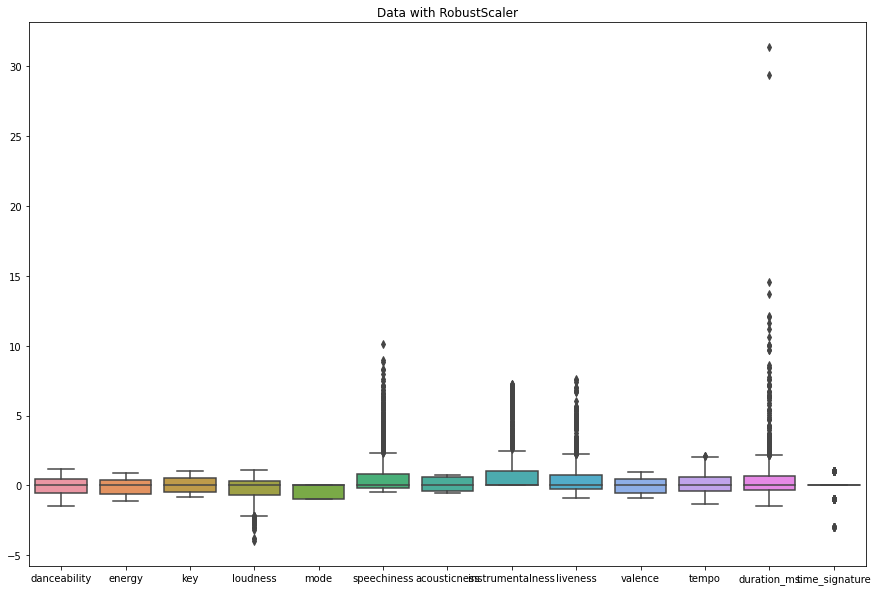

In [21]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled_robustscaler.loc[:, songs.columns]).set_title('Data with RobustScaler')

In [106]:
quantiletrans = QuantileTransformer()

songs_scaled_quantiletrans = quantiletrans.fit_transform(songs)

songs_scaled_quantiletrans = pd.DataFrame(songs_scaled_quantiletrans, columns = songs.columns, index = songs.index)

In [107]:
songs_scaled_quantiletrans.shape

(1387, 13)

Text(0.5, 1.0, 'Data with QuantileTransformer')

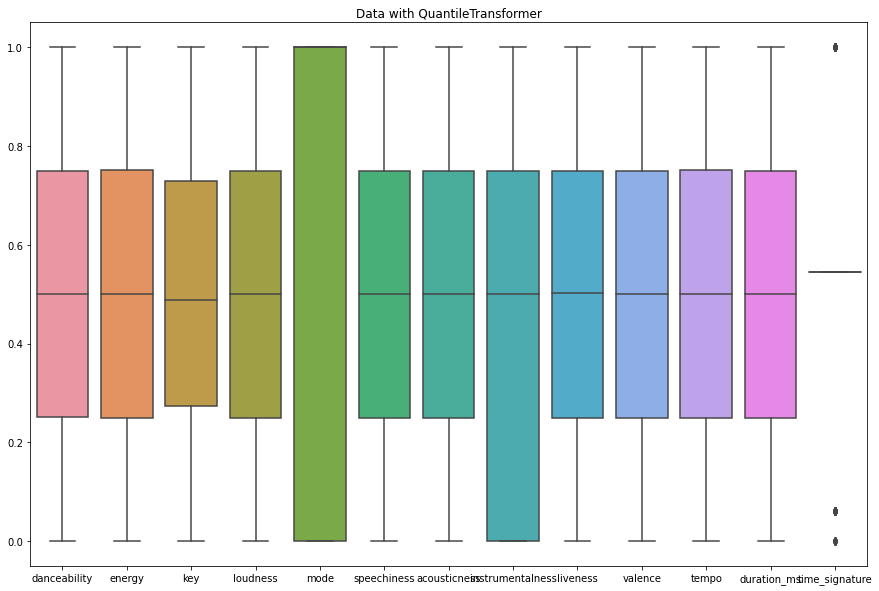

In [108]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled_quantiletrans.loc[:, songs.columns]).set_title('Data with QuantileTransformer')

In [29]:
from sklearn.cluster import KMeans

In [31]:
songs_kmeans = KMeans(n_clusters=5)
songs_kmeans.fit(songs_scaled_minmax)
songs_scaled_minmax['cluster'] = songs_kmeans.labels_

In [32]:
songs_scaled_minmax

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,0.181818,0.723440,1.0,0.281838,0.859437,0.000035,0.072592,0.853947,0.224187,0.016023,0.75,0
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75,0
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75,0
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75,0
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.157452,0.069660,0.272727,0.461981,1.0,0.043596,0.920683,0.725888,0.064814,0.047545,0.244005,0.248397,0.75,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.141973,0.101387,0.545455,0.495329,1.0,0.037988,0.858433,0.432487,0.050503,0.016470,0.213537,0.211094,0.75,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.000000,0.000913,0.818182,0.031808,1.0,0.036541,0.954819,0.983756,0.058592,0.015330,0.139723,0.046743,0.50,2


In [85]:
test_sample

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
"Symphony, Op. 21: I. Ruhig schreitend",Anton Webern,0.122070,0.005793,0.727273,0.337166,1.0,0.039978,0.972892,0.070761,0.590376,0.015952,0.301071,0.086004,0.00,0
Vincent,Don McLean,0.397391,0.085323,0.636364,0.549977,1.0,0.023517,0.911646,0.000005,0.331121,0.454112,0.267009,0.048157,0.50,0
Sixteen Tons,Tennessee Ernie Ford,0.700354,0.325287,1.000000,0.644545,1.0,0.328871,0.799196,0.000000,0.233641,0.375388,0.603043,0.025459,0.75,0
In Da Club,50 Cent,0.928129,0.715858,0.545455,0.915654,0.0,0.620116,0.256022,0.000000,0.051955,0.784545,0.257700,0.034828,0.75,1
Fever,Peggy Lee,0.754533,0.090243,0.818182,0.554373,0.0,0.243849,0.090962,0.000000,0.095717,0.343277,0.560476,0.036924,0.75,1
The Real Slim Shady,Eminem,0.983414,0.663648,0.454545,0.882856,0.0,0.061505,0.030319,0.000000,0.025614,0.766936,0.349978,0.059004,0.75,1
Symphonia: Sum Fluxae Pretium Spei: 2. Adagio tenebroso,Elliott Carter,0.139761,0.065142,0.181818,0.485283,1.0,0.030933,0.872490,0.622335,0.064814,0.014398,0.550835,0.263169,0.50,2
"The Planets - Suite for large orchestra, Op.32: I. Mars, the Bringer of War (Allegro)",Gustav Holst,0.153030,0.297174,0.000000,0.539711,1.0,0.034913,0.763052,0.924873,0.364306,0.053449,0.661565,0.101924,1.00,2
Pop 1,GAS,0.016807,0.041145,0.454545,0.567673,1.0,0.031295,0.927711,0.962437,0.070829,0.420965,0.209687,0.066294,0.50,2


0 - classic, slow rock, country
1 - rap
2 - classic, ambient
3 - 

### Evaluate when checking the distance between centroids

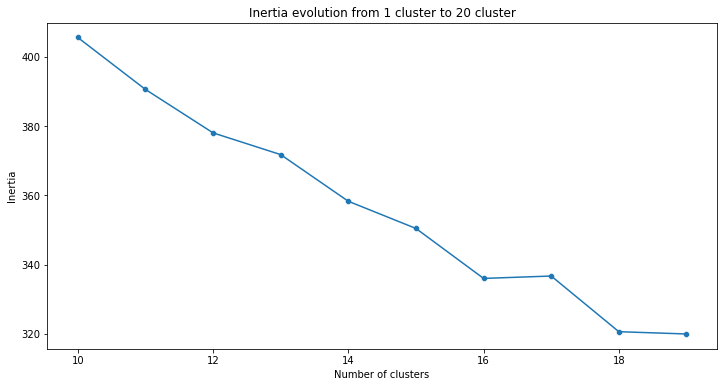

In [130]:
max_k = 20
min_k = 10
inertia = []

for k in range(min_k, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_scaled_minmax).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(min_k, max_k), y=inertia)
sns.scatterplot(x=range(min_k, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Silhouette Score

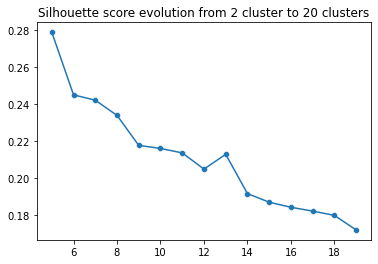

In [131]:
from sklearn.metrics import silhouette_score
max_k = 20
min_k = 5
sil_score = []

for k in range(min_k, max_k): 
    labels = KMeans(n_clusters=k).fit(songs_scaled_minmax).labels_
    sil_score.append(silhouette_score(songs_scaled_minmax, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(min_k, max_k), y=sil_score)
sns.scatterplot(x=range(min_k, max_k), y=sil_score)
plt.show()

In [305]:
songs_kmeans = KMeans(n_clusters=13)
songs_kmeans.fit(songs_scaled_minmax)


KMeans(n_clusters=13)

In [192]:
test_sample = songs_scaled_minmax.groupby('cluster').sample(4)

In [307]:
cluster_centers_df = pd.DataFrame(data=songs_kmeans.cluster_centers_, columns= songs_scaled_minmax.columns)

In [308]:
songs_scaled_minmax['cluster'] = songs_kmeans.labels_

In [309]:
cluster_1_songs = songs_scaled_minmax.query('cluster == 1')

In [310]:
cluster_1_songs = cluster_1_songs.assign(distance = 0)

In [311]:
for i, song in cluster_1_songs.iterrows():
    total = sum(((song.iloc[pos]- cluster_centers_df.iloc[1][pos])**2) for pos in range(songs_scaled_minmax.shape[1]-3))**(1/2)
    cluster_1_songs.loc[i,'distance'] = total

C:\Users\HANA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2894: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(
C:\Users\HANA\anaconda3\lib\site-packages\IPython\core\async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [287]:
cluster_1_songs

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,distance
name,artist,,,,,,,,,,,,,,,
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75,1,0.542161
I Can't Stop Loving You,Ray Charles,0.276869,0.280106,0.454545,0.678244,1.0,0.013748,0.818273,0.000000,0.308307,0.370209,0.189677,0.051522,0.50,1,0.325708
True Love Ways,Buddy Holly,0.178461,0.124480,0.909091,0.546504,1.0,0.020622,0.803212,0.104569,0.306233,0.265589,0.210938,0.028230,0.75,1,0.431898
Sea Of Love,Phil Phillips,0.253649,0.354405,0.636364,0.705722,1.0,0.010854,0.865462,0.000001,0.156901,0.302880,0.228234,0.021807,0.75,1,0.270333
"Love Me Tender - From the 20th Century-Fox CinemaScope Production, ""Love Me Tender""",Elvis Presley,0.371959,0.037430,0.818182,0.566354,1.0,0.033285,0.910642,0.000045,0.093643,0.292521,0.340701,0.026273,0.50,1,0.329735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Six Pieces For Orchestra, Op.6 - Original Version (1909): 1. Etwas bewegt",Anton Webern,0.128704,0.010422,0.363636,0.283726,1.0,0.028401,0.872490,0.030964,0.051333,0.043505,0.217789,0.000597,0.50,1,0.518992
"Symphony, Op. 21: I. Ruhig schreitend",Anton Webern,0.122070,0.005793,0.727273,0.337166,1.0,0.039978,0.972892,0.070761,0.590376,0.015952,0.301071,0.086004,0.00,1,0.604060
Sinfonia: III. In ruhig fliessender Bewegung,Luciano Berio,0.232640,0.257013,0.636364,0.560792,1.0,0.081042,0.863453,0.153299,0.366380,0.159934,0.213665,0.171844,0.50,1,0.289578


In [312]:
playlist_1 = cluster_1_songs.sort_values('distance').head(20)

In [289]:
playlist_1

danceability  \
name                                               artist                            
Unforgettable                                      Nat King Cole          0.319991   
                                                   Nat King Cole          0.319991   
Mr. Blue                                           The Fleetwoods         0.347634   
Solitude                                           Billie Holiday         0.444936   
Dedicated To You                                   John Coltrane          0.390756   
Sea Of Love                                        Phil Phillips          0.253649   
Misty                                              Johnny Mathis          0.172932   
Strange Fruit                                      Billie Holiday         0.280186   
Sinfonia: III. In ruhig fliessender Bewegung       Luciano Berio          0.232640   
You Belong To Me                                   Jo Stafford            0.344317   
Tennessee Waltz                                    Patti Page             0.451570   
La Bohème / Act 1: "O soave fanciulla"             Giacomo Puccini        0.115436   
I Can't Stop Loving You                            Ray Charles            0.276869   
Love Me Tender - From the 20th Century-Fox Cine... Elvis Presley          0.371959   
Rigoletto / Act 3: "La donna è mobile"             Luciano Pavarotti      0.338788   
Adriana Lecouvreur / Act 1: "Ecco: respiro appe... Francesco Cilea        0.166298   
All of Me                                          John Legend            0.400708   
Vincent                                            Don McLean             0.397391   
It's Not for Me to Say - From the MGM Film "Liz... Johnny Mathis          0.296771   
I Only Have Eyes for You                           The Flamingos          0.544449   

                                                                        energy  \
name                                               artist                        
Unforgettable                                      Nat King Cole      0.182714   
                                                   Nat King Cole      0.182714   
Mr. Blue                                           The Fleetwoods     0.089238   
Solitude                                           Billie Holiday     0.150585   
Dedicated To You                                   John Coltrane      0.055402   
Sea Of Love                                        Phil Phillips      0.354405   
Misty                                              Johnny Mathis      0.268057   
Strange Fruit                                      Billie Holiday     0.043856   
Sinfonia: III. In ruhig fliessender Bewegung       Luciano Berio      0.257013   
You Belong To Me                                   Jo Stafford        0.145565   
Tennessee Waltz                                    Patti Page         0.171670   
La Bohème / Act 1: "O soave fanciulla"             Giacomo Puccini    0.185726   
I Can't Stop Loving You                            Ray Charles        0.280106   
Love Me Tender - From the 20th Century-Fox Cine... Elvis Presley      0.037430   
Rigoletto / Act 3: "La donna è mobile"             Luciano Pavarotti  0.174682   
Adriana Lecouvreur / Act 1: "Ecco: respiro appe... Francesco Cilea    0.120464   
All of Me                                          John Legend        0.265045   
Vincent                                            Don McLean         0.085323   
It's Not for Me to Say - From the MGM Film "Liz... Johnny Mathis      0.218860   
I Only Have Eyes for You                           The Flamingos      0.314243   

                                                                           key  \
name                                               artist                        
Unforgettable                                      Nat King Cole      0.454545   
                                                   Nat King Cole      0.454545   
Mr. Blue                                    

In [ ]:
 pd.DataFrame(data=data[1:,1:],    # values
...              index=data[1:,0],    # 1st column as index
...              columns=data[0,1:])  # 1st row as the column names

In [313]:
playlist_1 = playlist_1.reset_index()

In [136]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import json
import keys

In [276]:
scope = 'playlist-modify-public'
username = keys.username
redirectUri = 'http://localhost:8888/callback'

token = SpotifyOAuth(scope=scope,username=username,client_id=keys.client_id, client_secret=keys.client_secret ,redirect_uri='http://localhost:7000/callback',)
spotifyObject = spotipy.Spotify(auth_manager = token)

In [314]:
playlist_name = 'akbars_playlist_cluster_1_copy'
playlist_description= ''

In [315]:
playlist_id = spotifyObject.user_playlist_create(user=username,name=playlist_name,public=True,description=playlist_description)['id']

In [316]:
list_of_songs = []
for index, song in playlist_1.iterrows():
    result = spotifyObject.search(q=f"{song['name']} artist:{song['artist']}",type='track',limit=1)
    try:
        list_of_songs.append(result['tracks']['items'][0]['uri'])
    except:
        continue

In [317]:
spotifyObject.user_playlist_add_tracks(user=username,playlist_id=playlist_id,tracks=list_of_songs)

{'snapshot_id': 'MiwyYTk4YmViOGNlOWE3NTg1YmY0ZTg4YmQ3ZDA4NzgyNjNjZTg0ZDZk'}